In [13]:
# !pip install rasterio

In [14]:
from google.colab import drive
drive.mount('/content/drive')

dem_path = "/content/drive/My Drive/Image Segmentation/"
lowres_dem_path = dem_path + 'Firsoff_HiRISE_5_low_res.tif-adj.tif'
high_dem_path = dem_path + 'Firsoff_HiRISE_5.tif-adj.tif'
hill_shade_path = dem_path + 'Hillshade.tif'
slope_path = dem_path + 'slope.tif'
aspect_path = dem_path + 'aspect.tif'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import rasterio
from rasterio.fill import fillnodata
import rasterio.plot

In [69]:
tif_file = high_dem_path
with rasterio.open(tif_file) as src:
    profile = src.profile
    arr = src.read(1)
    arr = fillnodata(arr, mask=src.read_masks(1), max_search_distance=35, smoothing_iterations=0)

newtif_file = dem_path + "high_dem_filled.tif"   
with rasterio.open(newtif_file, 'w', **profile) as dest:
    dest.write_band(1, arr)

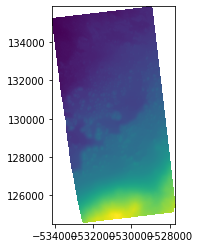

In [70]:
with rasterio.open(newtif_file) as filled:
  rasterio.plot.show(filled)

In [53]:
arr.shape

(11339, 6418)

In [54]:
import numpy as np